# Inmobiliaria

###Importe de base de datos

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt
from urllib import request
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/inmobiliaria.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

###Ejercicio 1

Obtengo primero las matrices X e Y

In [ ]:
valores_x = dataset[:, 0:2]
x = np.append(np.ones((valores_x.shape[0], 1)), valores_x, axis = 1)

y = dataset[:, 2:]

Calculo la pseudo-inversa y obtengo la solucion optima:

In [ ]:
pseudoinversa_x = np.linalg.pinv(x)
sol_op = np.matmul(pseudoinversa_x, y)
sol_op

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

En base a esto, podemos determinar un modelo para determinar el precio a partir de la superficie y las habitaciones:

In [ ]:
def calcular_precio_por_superficie_y_habitaciones(s, h):
  return sol_op[1][0] * s + sol_op[2][0] * h + sol_op[0][0]

Con esto, calculo el ECM:

In [ ]:
def ecm(valores_x, y_real):
  y_pred = []
  for i in range(0, valores_x.shape[0]):
    y_pred.append([calcular_precio_por_superficie_y_habitaciones(valores_x[i][0], valores_x[i][1])])
  y_pred = np.array(y_pred)
  return np.square(np.subtract(y_real, y_pred)).mean()

ecm(valores_x, y)

4086560101.205656

###Ejercicio 2

Evaluo la funcion para el modelo en 1650 sq-ft de superficie y 3 habitaciones:

In [ ]:
calcular_precio_por_superficie_y_habitaciones(1650, 3)

293081.46433489607

###Con Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0000000001), loss='MeanSquaredError')
hist = model.fit(x=valores_x, y=y, batch_size = 47, epochs= 100)


Epoch 1/100
1/1 [==============================] - 20s 20s/step - loss: 132958330880.0000
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 132721557504.0000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 132485210112.0000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 132249305088.0000
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 132013842432.0000
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 131778805760.0000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 131544203264.0000
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 131310051328.0000
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 131076308992.0000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 130843009024.0000
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 130610135040.0000
Epoch 12/100
1/1 [

In [ ]:
###HASTA CONVERGENCIA
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0000000001),loss='MeanSquaredError')
hist = model.fit(x=valores_x, y=y, batch_size = 47, epochs=100000,callbacks=[es])

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 5ms/step - loss: 4856643584.0000
Epoch 4040/100000
1/1 [==============================] - 0s 5ms/step - loss: 4856530432.0000
Epoch 4041/100000
1/1 [==============================] - 0s 5ms/step - loss: 4856418304.0000
Epoch 4042/100000
1/1 [==============================] - 0s 5ms/step - loss: 4856306176.0000
Epoch 4043/100000
1/1 [==============================] - 0s 5ms/step - loss: 4856195072.0000
Epoch 4044/100000
1/1 [==============================] - 0s 5ms/step - loss: 4856083968.0000
Epoch 4045/100000
1/1 [==============================] - 0s 6ms/step - loss: 4855971840.0000
Epoch 4046/100000
1/1 [==============================] - 0s 5ms/step - loss: 4855859712.0000
Epoch 4047/100000
1/1 [==============================] - 0s 5ms/step - loss: 4855749120.0000
Epoch 4048/100000
1/1 [==============================] - 0s 5ms/step - loss: 4855638528.0000
Epoch 4049/100000
1/1 [====

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
losses = np.array(hist.history['loss']) #riesgo empirico
param = model.get_weights() #parametros conseguidos
prediction = model.predict(x=valores_x) #valor de x a conseguir

In [ ]:
param

[array([[165.02428  ],
        [ -0.6428374]], dtype=float32), array([0.08460797], dtype=float32)]

###Ejercicio 5

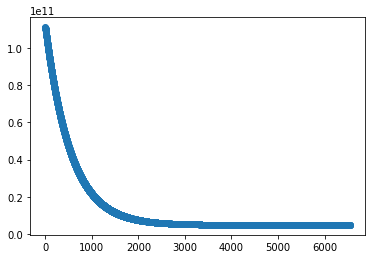

In [ ]:
epochs = np.array(range(1, 6539))

plt.scatter(epochs, losses)

plt.show()

###Con normalizacion

In [ ]:
# Normalizo para que converja más fácilmente

media_superficies = valores_x[:, 0:1].mean()
media_habitaciones = valores_x[:, 1:].mean()

varianza_superficies = valores_x[:, 0:1].std()
varianza_habitaciones = valores_x[:, 1:].std()

x_normalizada = (valores_x - valores_x.mean(axis=0))/valores_x.std(axis=0)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5), loss='MeanSquaredError')
hist = model.fit(x=x_normalizada, y=y, batch_size = 47, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 207ms/step - loss: 131183263744.0000
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 7603460096.0000
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 5189331456.0000
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 4432348672.0000
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 4194986496.0000
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 4120558592.0000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 4097220352.0000
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 4089902592.0000
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 4087608320.0000
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 4086889216.0000
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 4086663680.0000
Epoch 12/100
1/1 [==================

In [ ]:
###HASTA CONVERGENCIA
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),loss='MeanSquaredError')
hist = model.fit(x=x_normalizada, y=y, batch_size = 47, epochs=100000,callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 0s 186ms/step - loss: 4086560000.0000
Epoch 2/100000
1/1 [==============================] - 0s 10ms/step - loss: 4086560000.0000
